# Mini Project - Country Classifiation of Covid-19 tweets

Thomas Durkin and Miguel Novo Villar

In [2]:
import random as rand
import pandas as pd
import re
import emoji
import html
import matplotlib.pyplot as plt
import numpy as np
import swifter
import seaborn as sns
import translators as ts
import warnings
import nltk

from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
from google_trans_new import google_translator
from langdetect import detect
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from time import time

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("averaged_perceptron_tagger")

Using state New York server backend.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
rand.seed(0)

In [5]:
training_df = pd.read_csv(r"C:/Users/Thomas/Desktop/training_data_new.csv")
training_df

C:\Users\Thomas\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text,expanded_urls
0,0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,NaN
1,1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,NaN
2,2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,https://www.science.org/content/article/new-wh...
3,3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,https://news.trust.org/item/20200717070925-r4m...
4,4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,NaN
...,...,...,...,...,...,...,...,...,...
239995,239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,True,True,Mastеr,new_zealand,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN
239996,239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,False,True,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,Very interesting\nAny thoughts?\n\n#TheFive #T...,https://twitter.com/Franck2Ausa/status/1287847...
239997,239997,As we deal with #COVID19 don't forget that #Ch...,NaN,True,True,COVID19 Christians persecution Nigeria,new_zealand,As we deal with #COVID19 don't forget that #Ch...,https://twitter.com/psjuk_official/status/1253...
239998,239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,False,True,COVID19,new_zealand,"While we hit 150,000 in #COVID19 deaths, the P...",NaN


In [6]:
test_df = pd.read_csv(r"C:/Users/Thomas/Desktop/test_data_new.csv")
test_df

,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,Id,expanded_urls,all_english_text
0,0,"Ethical investing is not optional anymore, say...",NaN,False,False,covid19,0,https://www.podbean.com/media/share/pb-uba6x-d...,"Ethical investing is not optional anymore, say..."
1,1,#COVID19 | Suite à la conférence de presse du ...,NaN,False,True,COVID19,1,https://twitter.com/gouvernementFR/status/1332...,#COVID19 | Following the Prime Minister's pres...
2,2,"Yesterday, I had a live discussion with @Steve...",NaN,False,True,COVID19,2,https://www.cnn.com/world/live-news/coronaviru...,"Yesterday, I had a live discussion with @Steve..."
3,3,Nepal - #Coronavirus cases up 24% in a week. D...,NaN,False,True,Coronavirus,3,https://flutrackers.com/forum/forum/-2019-ncov...,Nepal - #Coronavirus cases up 24% in a week. D...
4,4,American economy jumped up a % big news story...,NaN,False,False,LysolAndCloroxSales,4,NaN,American economy jumped up a % big news story...
...,...,...,...,...,...,...,...,...,...
59995,59995,Who knew all we had to do was eat a tenner’s w...,NaN,False,True,Covid19,59995,https://twitter.com/ShaneBeattyNews/status/127...,Who knew all we had to do was eat a tenner’s w...
59996,59996,"Our death toll of more than 160,000 souls tell...",NaN,False,True,coronavirus,59996,https://twitter.com/TeamPelosi/status/12919060...,"Our death toll of more than 160,000 souls tell..."
59997,59997,"Apparently, Donald Trump doesn't care about Am...",NaN,False,True,COVID19,59997,NaN,"Apparently, Donald Trump doesn't care about Am..."
59998,59998,Is #HulaHooping the perfect #SocialDistancing ...,NaN,False,False,HulaHooping SocialDistancing London,59998,https://www.swlondoner.co.uk/life/08072020-hul...,Is #HulaHooping the perfect #SocialDistancing ...


### This code will be used to add a translations column to the data.

In [5]:
#https://towardsdatascience.com/twitter-json-data-processing-3f353a5deac4
#https://towardsdatascience.com/how-to-detect-and-translate-languages-for-nlp-project-dfd52af0c3b5


# tweets_en = []

# def new_col_translated(data, target_lang):
#     for tweet in  tqdm(data.text):

#         try: #english tweets
            
#             result_lang = detect(tweet)
#             if result_lang == target_lang:
#                 tweets_en.append(tweet) 

#             else: #other language tweets

#                 ############API does not work############
#                 # translator = google_translator()
#                 # translate_text = translator.translate(tweet, lang_src=result_lang, lang_tgt=target_lang) 
#                 ############API does not work############

#                 translate_text = ts.google(tweet, from_language= result_lang, to_language=target_lang)
#                 tweets_en.append(translate_text) 

#         except: #unable to translate
#             tweets_en.append(tweet)

# new_col_translated(data_test, "en")
# data_test['all_english_text'] = np.array(tweets_en) #load into dataframe

## Part I: Descriptive Analysis - A

Create a table that contains information on minimum, average, median, and maximum for the following: tweet length (#characters and #words) (text column), hashtag length (#characters and #words) (hashtags column) (Add your table to the report at the end.) (10 points for undergraduate students, 5 points for graduate students)

#### Characters

In [6]:
#Calculate the AVERAGE length of tweets (Characters)
def tweet_len_char_avg(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return sum(lenghts)/len(data)
tweet_len_char_avg(training_df.text)

204.98047916666667

In [7]:
#Calculate the MAX length of tweets (Characters)
def tweet_len_char_max(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return max(lenghts)
tweet_len_char_max(training_df.text)

425

In [8]:
#Calculate the MIN length of tweets (Characters)
def tweet_len_char_min(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return min(lenghts)
tweet_len_char_min(training_df.text)

1

In [9]:
#Calculate the MEDIAN length of tweets (Characters)
def tweet_len_char_median(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return np.median(lenghts)
tweet_len_char_median(training_df.text)

221.0

#### Words

In [10]:
#Calculate the AVERAGE number of words
def tweet_len_words_avg(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return sum(word_count)/len(data)
tweet_len_words_avg(training_df.text)

28.832408333333333

In [11]:
#Calculate the MIN number of Words in tweets
def tweet_len_words_min(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return min(word_count)
tweet_len_words_min(training_df.text)

1

In [12]:
#Calculate the MAX number of Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return max(word_count)
tweet_len_words_max(training_df.text)

82

In [13]:
#Calculate the MEDIAN number of Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return np.median(word_count)
tweet_len_words_max(training_df.text)

30.0

#### HASHTHAG COL

In [14]:
#Calculate the AVERAGE length of hashtags (Characters)
def hashtag_len_char_avg(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return sum(lenghts)/len(data)
hashtag_len_char_avg(training_df.hashtags)

16.503920833333332

In [15]:
#Calculate the MIN length of hashtags (Characters)
def hashtag_len_char_min(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return min(lenghts)
hashtag_len_char_min(training_df.hashtags)

1

In [16]:
#Calculate the MAX length of hashtags (Characters)
def hashtag_len_char_max(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return max(lenghts)
hashtag_len_char_max(training_df.hashtags)

124

In [17]:
#Calculate the MEDIAN length of hashtags (Characters)
def hashtag_len_char_median(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return np.median(lenghts)
hashtag_len_char_median(training_df.hashtags)

11.0

In [18]:
#Calculate the AVERAGE number of hashtags
def hashtags_len_words_avg(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return sum(word_count)/len(data)
hashtags_len_words_avg(training_df.hashtags)

1.8100708333333333

In [19]:
#Calculate the MIN number of hashtags
def hashtags_len_words_min(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return min(word_count)
hashtags_len_words_min(training_df.hashtags)

1

In [20]:
#Calculate the MAX number of hashtags
def hashtags_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return max(word_count)
hashtags_len_words_max(training_df.hashtags)

20

In [21]:
#Calculate the MEDIAN number of hashtags
def hashtags_len_words_median(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return np.median(word_count)
hashtags_len_words_median(training_df.hashtags)

1.0

## Part I: Descriptive Analysis - B

Find the top ten most commonly used hashtags (hashtags column) in the training dataset by
calculating the frequency. Then, create a stacked bar chart (one stacked bar per country) which
shows the distribution of these ten most commonly used hashtags for each country. Do you
observe any patterns? Write your findings in the report. (Add the stacked bar chart to the report
at the end.) (10 points for undergraduate students, 5 points for graduate students)


In [22]:
hashtags_df = pd.DataFrame(training_df.hashtags.str.split(' ').tolist(),
						index = training_df.country).stack()
hashtags_df = hashtags_df.reset_index([0, 'country'])
hashtags_df.columns = ['Country', 'Hashtag']

hashtags_df[:10]

,Country,Hashtag
0,us,WuhanCoronaVirus
1,us,KillerCuomo
2,us,Trump
3,us,COVID19
4,us,Pakistan
5,us,GreenStimulus
6,us,Nature
7,us,Green
8,us,coronavirus
9,us,COVID__19


In [23]:
topTenHashtags = hashtags_df['Hashtag'].value_counts()[:10].index
topTenHashtags

Index(['COVID19', 'coronavirus', 'Covid19', 'covid19', 'COVID', 'Coronavirus',
       'Covid_19', 'COVIDー19', 'Covid', 'StaySafe'],
      dtype='object')

In [24]:
countryValues = pd.crosstab(index = hashtags_df['Country'], columns = hashtags_df['Hashtag'])
countryValues

Hashtag,02JUL20,0613FM_0509,06strong,1-Jun,10-Jul,10-Jun,1000families,1000islands,1000lives,1000names,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
Country,,,,,,,,,,,,,,,,,,,,,
australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
canada,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
ireland,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,1,1,0,0,0,0
new_zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
uk,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,1,2,0,0
us,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
countryTopTenValues = countryValues[topTenHashtags]
countryTopTenValues

Hashtag,COVID19,coronavirus,Covid19,covid19,COVID,Coronavirus,Covid_19,COVIDー19,Covid,StaySafe
Country,,,,,,,,,,
australia,15268,4072,1522,2025,1575,987,1060,819,480,341
canada,15940,4172,1916,1629,1190,1174,1041,895,558,447
ireland,14535,3666,3812,1537,896,861,1386,959,705,1168
new_zealand,16680,3571,2303,1493,1764,1044,1158,1078,599,331
uk,13734,5292,2036,1454,1279,1375,1127,949,654,603
us,17054,4890,1053,1170,1795,1433,853,890,498,210


c:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


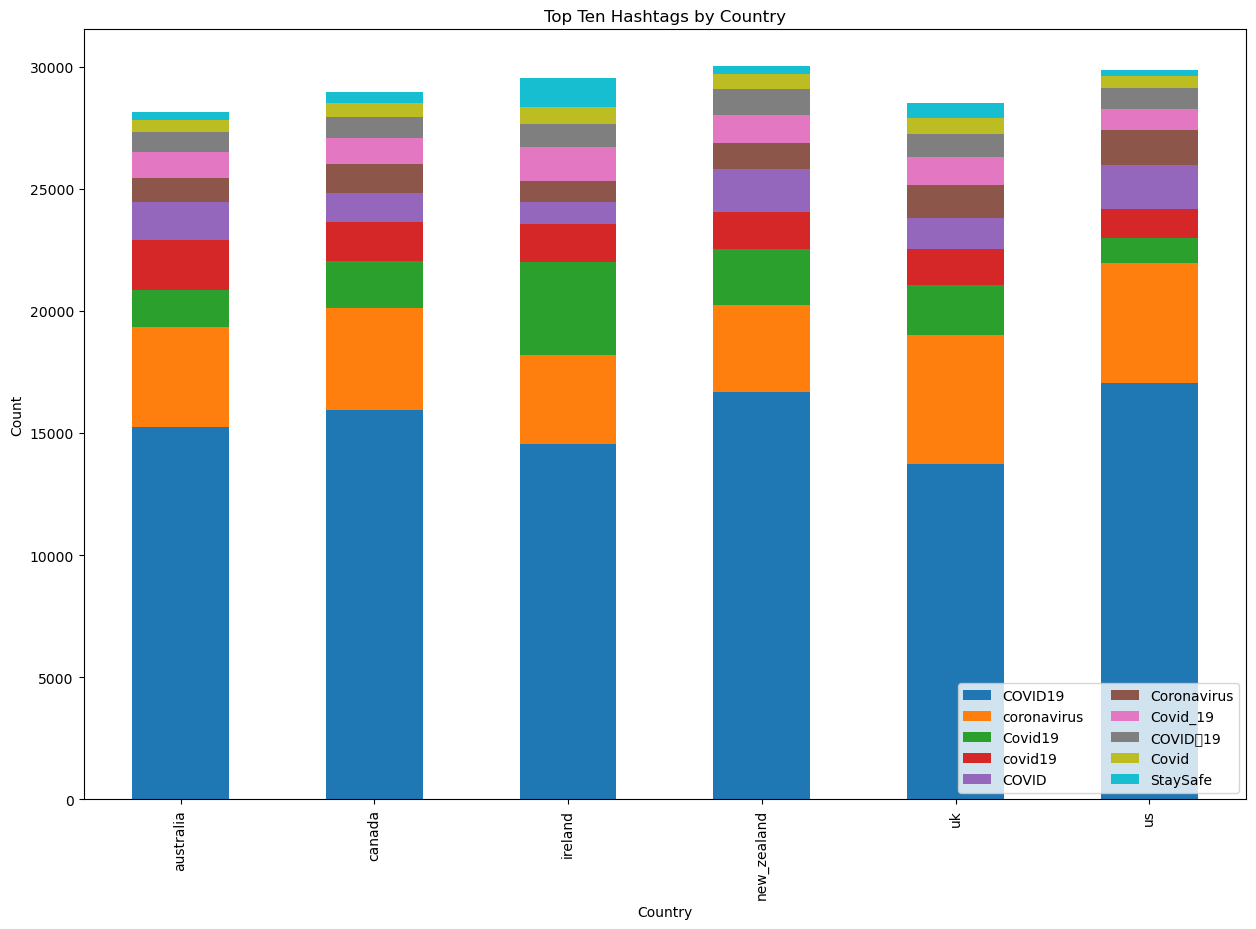

In [26]:
countryTopTenValues.plot(kind = 'bar', 
						 stacked = True,
						 figsize = (15,10))

plt.legend(loc="lower right", ncol=2)
plt.ylabel("Count")
plt.title("Top Ten Hashtags by Country")
plt.show()

## Part I: Descriptive Analysis - C

Using the lda_tutorial.pdf file in the assignment folder, perform a Latent Dirichlet Allocation (LDA) analysis to extract the topics in the text column in an unsupervised manner. Set the number of clusters/topics to 10 (ten) (you can adjust other settings to obtain the results that you think work the best). What are your observations? Does each cluster seem to form a meaningful subset? What do they seem to represent? (Add the clusters and your observations to the report at the end.) (10 points for undergraduate students, 5 points for graduate students)

### Steps
1- Data Cleaning

2- EDA

3- Prepare data for LDA analysis

4- LDA Model Training

5- Analyze LDS model results

In [27]:
#Cleaning the text. 
# Source: https://www.kaggle.com/code/clmentbisaillon/twitter-customer-support-data-cleaning

rare = re.compile(r"\^\S*")
new_line = re.compile(r"\n+\S*")
sig = re.compile(r"-\S*")

#Initial preprocessing function
def preprocessor(data):
    corpus = []
    for i in tqdm(range(len(data))):
        #remove urls
        tweet= re.sub(r'http\S+', ' ', data["all_english_text"][i])

        #remove mentions
        tweet = re.sub('@[A-Za-z0–9]+', '', tweet)
        tweet = re.sub("@[\w]*","",tweet)
        
        # # # Contractions (Source: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook)
        tweet = re.sub(r"he's", "he is", tweet)
        tweet = re.sub(r"there's", "there is", tweet)
        tweet = re.sub(r"We're", "We are", tweet)
        tweet = re.sub(r"That's", "That is", tweet)
        tweet = re.sub(r"won't", "will not", tweet)
        tweet = re.sub(r"they're", "they are", tweet)
        tweet = re.sub(r"Can't", "Cannot", tweet)
        tweet = re.sub(r"wasn't", "was not", tweet)
        tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
        tweet = re.sub(r"aren't", "are not", tweet)
        tweet = re.sub(r"isn't", "is not", tweet)
        tweet = re.sub(r"What's", "What is", tweet)
        tweet = re.sub(r"haven't", "have not", tweet)
        tweet = re.sub(r"hasn't", "has not", tweet)
        tweet = re.sub(r"There's", "There is", tweet)
        tweet = re.sub(r"He's", "He is", tweet)
        tweet = re.sub(r"It's", "It is", tweet)
        tweet = re.sub(r"You're", "You are", tweet)
        tweet = re.sub(r"I'M", "I am", tweet)
        tweet = re.sub(r"shouldn't", "should not", tweet)
        tweet = re.sub(r"wouldn't", "would not", tweet)
        tweet = re.sub(r"i'm", "I am", tweet)
        tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
        tweet = re.sub(r"I'm", "I am", tweet)
        tweet = re.sub(r"Isn't", "is not", tweet)
        tweet = re.sub(r"Here's", "Here is", tweet)
        tweet = re.sub(r"you've", "you have", tweet)
        tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
        tweet = re.sub(r"we're", "we are", tweet)
        tweet = re.sub(r"what's", "what is", tweet)
        tweet = re.sub(r"couldn't", "could not", tweet)
        tweet = re.sub(r"we've", "we have", tweet)
        tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
        tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
        tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
        tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
        tweet = re.sub(r"who's", "who is", tweet)
        tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
        tweet = re.sub(r"y'all", "you all", tweet)
        tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
        tweet = re.sub(r"would've", "would have", tweet)
        tweet = re.sub(r"it'll", "it will", tweet)
        tweet = re.sub(r"we'll", "we will", tweet)
        tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
        tweet = re.sub(r"We've", "We have", tweet)
        tweet = re.sub(r"he'll", "he will", tweet)
        tweet = re.sub(r"Y'all", "You all", tweet)
        tweet = re.sub(r"Weren't", "Were not", tweet)
        tweet = re.sub(r"Didn't", "Did not", tweet)
        tweet = re.sub(r"they'll", "they will", tweet)
        tweet = re.sub(r"they'd", "they would", tweet)
        tweet = re.sub(r"DON'T", "DO NOT", tweet)
        tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
        tweet = re.sub(r"they've", "they have", tweet)
        tweet = re.sub(r"i'd", "I would", tweet)
        tweet = re.sub(r"should've", "should have", tweet)
        tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
        tweet = re.sub(r"where's", "where is", tweet)
        tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
        tweet = re.sub(r"we'd", "we would", tweet)
        tweet = re.sub(r"i'll", "I will", tweet)
        tweet = re.sub(r"weren't", "were not", tweet)
        tweet = re.sub(r"They're", "They are", tweet)
        tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
        tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
        tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
        tweet = re.sub(r"let's", "let us", tweet)
        tweet = re.sub(r"it's", "it is", tweet)
        tweet = re.sub(r"can't", "cannot", tweet)
        tweet = re.sub(r"don't", "do not", tweet)
        tweet = re.sub(r"you're", "you are", tweet)
        tweet = re.sub(r"i've", "I have", tweet)
        tweet = re.sub(r"that's", "that is", tweet)
        tweet = re.sub(r"i'll", "I will", tweet)
        tweet = re.sub(r"doesn't", "does not", tweet)
        tweet = re.sub(r"i'd", "I would", tweet)
        tweet = re.sub(r"didn't", "did not", tweet)
        tweet = re.sub(r"ain't", "am not", tweet)
        tweet = re.sub(r"you'll", "you will", tweet)
        tweet = re.sub(r"I've", "I have", tweet)
        tweet = re.sub(r"Don't", "do not", tweet)
        tweet = re.sub(r"I'll", "I will", tweet)
        tweet = re.sub(r"I'd", "I would", tweet)
        tweet = re.sub(r"Let's", "Let us", tweet)
        tweet = re.sub(r"you'd", "You would", tweet)
        tweet = re.sub(r"It's", "It is", tweet)
        tweet = re.sub(r"Ain't", "am not", tweet)
        tweet = re.sub(r"Haven't", "Have not", tweet)
        tweet = re.sub(r"Could've", "Could have", tweet)
        tweet = re.sub(r"youve", "you have", tweet)  
        tweet = re.sub(r"donå«t", "do not", tweet) 
        
        # Character entity references
        tweet = re.sub(r"&gt;", "", tweet)
        tweet = re.sub(r"&lt;", "", tweet)
        tweet = re.sub(r"&amp;", "", tweet)      
        
        #remove emoji
        tweet=re.sub("[^\w\s#@/:%.,_-]", "", tweet, flags=re.UNICODE)#remove emoji
        
        tweet = tweet.replace('x', '')
        
        #remove html tags
        tweet = re.sub(r'<.*?>',' ', tweet) 
        
        #rare
        tweet = rare.sub(r'', tweet)

        #new line
        tweet = new_line.sub(r'.', tweet)

        #remove digits
        tweet = re.sub(r'\d+',' ', tweet)
        
        # #remove hashtags
        # tweet = re.sub(r'#\w+',' ', tweet)
        
        #remove white
        tweet = re.sub("^\\s+|\\s+$", "", tweet)  # Remove leading and trailing white space
        #unite multispace
        tweet = ' '.join(tweet.split())
        review = re.sub('[^a-zA-Z]', ' ', tweet)

        review = review.lower()
        review = review.split()

        review = ' '.join(review)
        corpus.append(review)
    return corpus   

#FUNCTIONS APPLIED

def convert_list_of_str_to_list_lists(X):
    return [list(sentence) for sentence in X]

def remove_stopwords(word_tokens):
    stop_words = stopwords.words('english')
    stop_words.extend(["amp","wa","ta","ha","nn","ie","ste"])
    return [w for w in word_tokens if not w.lower() in stop_words]

def tokenize_words(X, tweet_tokenizer=True, rmv_stopwords=True):
    if tweet_tokenizer:
        tokenize = TweetTokenizer().tokenize
    else:
        tokenize = nltk.word_tokenize

    word_tokens = [tokenize(sentence) for sentence in tqdm(X)]

    if rmv_stopwords:
        return [remove_stopwords(tokens) for tokens in tqdm(word_tokens)]
    else:
        return word_tokens

def pos_tagging_words(X):
    return [[nltk.pos_tag(sentence)] for sentence in X]

def lemmatize_words(X, lemmatizer):
    X_lemmatize = list()
    for sentence in tqdm(X):
        X_lemmatize.append([[lemmatizer.lemmatize(word)] for word in sentence])
    return X_lemmatize

def prepare_tokens_for_vectorize(X):
    X_preproc = list()
    for sentence_tok in tqdm(X):
        tokens = [tok[0] for tok in tqdm(sentence_tok)]
        X_preproc.append(" ".join(tokens))

    return X_preproc

In [28]:
X_train = preprocessor(training_df)
y_train = np.array(training_df["country"])

X_test = preprocessor(test_df)

X_token_train = tokenize_words(X_train)
X_token_test = tokenize_words(X_test)

X_pos_tag_train = pos_tagging_words(X_token_train)
X_pos_tag_test = pos_tagging_words(X_token_test)

X_lemma_train = lemmatize_words(X_token_train, WordNetLemmatizer())
X_lemma_test = lemmatize_words(X_token_test, WordNetLemmatizer())

X_prep_train = prepare_tokens_for_vectorize(X_lemma_train)
X_prep_test = prepare_tokens_for_vectorize(X_lemma_test)

#Attach
training_df["clean_text"] = np.array(X_prep_train)
test_df["clean_text"] = np.array(X_prep_test)

100%|██████████| 60000/60000 [00:10<00:00, 5547.95it/s]


In [ ]:
# # Join the different processed titles together.
long_string = ','.join(list(training_df["clean_text"].values))

# # Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# # Generate a word cloud
wordcloud.generate(long_string)

# # Visualize the word cloud
wordcloud.to_image()

In [ ]:
#Prepate text for LDA

# Load the library with the CountVectorizer method

sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    # import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(training_df["clean_text"].dropna())
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in tqdm(enumerate(model.components_)):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
            for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [ ]:
#%%time
#from pyLDAvis import sklearn as sklearn_lda
#import pickle
#import pyLDAvis

#LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

#if 1 == 1:
#    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
#    with open(LDAvis_data_filepath, 'wb') as f:
#        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk

#with open(LDAvis_data_filepath, 'rb') as f:
#    LDAvis_prepared = pickle.load(f)
#pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

### Answer: Topics
Topics found via LDA:

Topic #0: covid report new zealand day lockdown coronavirus today patient data

Topic #1: covid pandemic vaccine support new help coronavirus health business impact

Topic #2: covid case death new day coronavirus number people test positive

Topic #3: coronavirus covid uk test flu government positive people quarantine trump

Topic #4: covid dr coronavirus treatment fauci hydroychloroquine study virus immunity say

Topic #5: covid home stayhome worker school staysafe care family life people

Topic #6: covid mask people coronavirus spread face wear hand social distancing

Topic #7: covid coronavirus minister china lockdown say week day medical uk

Topic #8: covid trump coronavirus american people died america staysafe vote know

Topic #9: covid pandemic need health people crisis government response economy world

## Part I: Descriptive Analysis - D
Using the code in the following link4, perform Non-negative Matrix Factorization for topic analysis. Again, like in question c), set the number of clusters/topics to 10 (ten) and extract the topics in an unsupervised manner. Adjust any parameters as you see fit. Analyze the results. Do you see any similarities or differences with respect to your results in c) ? Explain. (5 points)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=False)
vectorizer.fit(X_prep_train+X_prep_test)

X_final_train = vectorizer.transform(X_prep_train)
X_final_test = vectorizer.transform(X_prep_test)

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(X_prep_train)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(X_prep_train)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

## Part I: Descriptive Analysis - E
Write a ‘text cleaner’ function that does the following: (i) remove stopwords5, (ii) remove all words that are shorter than 3 characters, (iii) remove all links (starting with http), (iv) remove emojis, (v) remove punctuation. Attach the code you wrote to the lemmatizer.py file in the project folder. Run the lemmatizer function and create ‘cleaned and lemmatized’ version of text column. (You can name the new column as text_clean). After the cleaning, expand the table you have created in Part I, a) by calculating minimum, average, median, and maximum for the newly created text_clean column (#characters and #words). (5 points)

Same text cleaner as used in Part C.

#### Characters

In [ ]:
#Calculate the AVERAGE lenght of CLEAN tweets (Characters)
def tweet_len_char_avg(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return sum(lenghts)/len(data)
tweet_len_char_avg(training_df.clean_text)

In [ ]:
#Calculate the MAX lenght of CLEAN tweets (Characters)
def tweet_len_char_max(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return max(lenghts)
tweet_len_char_max(training_df.clean_text)

In [ ]:
#Calculate the MIN lenght of CLEAN tweets (Characters)
def tweet_len_char_min(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return min(lenghts)
tweet_len_char_min(training_df.clean_text)

In [ ]:
#Calculate the MEDIAN lenght of CLEAN tweets (Characters)
def tweet_len_char_median(data):
    lenghts = []
    for i in data:
        lenghts.append(len(i))
    return np.median(lenghts)
tweet_len_char_median(training_df.clean_text)

#### WORDS

In [ ]:
#Calculate the AVERAGE number of CLEAN words
def tweet_len_words_avg(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return sum(word_count)/len(data)
tweet_len_words_avg(training_df.clean_text)

In [ ]:
#Calculate the MIN number of CLEAN Words in tweets
def tweet_len_words_min(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return min(word_count)
tweet_len_words_min(training_df.clean_text)

In [ ]:
#Calculate the MAX number of CLEAN Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return max(word_count)
tweet_len_words_max(training_df.clean_text)

In [ ]:
#Calculate the MEDIAN number of CLEAN Words in tweets
def tweet_len_words_max(data):
    word_count = []
    for i in data:
        word_count.append(len(i.split()))
    return np.median(word_count)
tweet_len_words_max(training_df.clean_text)

## Part I: Descriptive Analysis - F

Extract the unique set of all different hashtags found in the training dataset (i). Then, create one
separate data subset for each country by splitting the data using the country column (ii). As
next, for each country, create a vectorized format of the count values for all different hashtags
you have extracted in (i) (you should obtain one count vector per country with all unique
hashtags). Using cosine similarity6
, compute the pairwise similarity values between the different
count vectors you have created for each country. Finally, create a heatmap7 of the pairwise
similarity values you have calculated. What are some of your observations? Are any two countries
more similar to each other than others? If yes, explain. If not, explain, as well. Are there any very
large or very small values? (Add the graph you created to the report at the end.) (5 points)


In [ ]:
labels=['australia', 'canada', 'ireland', 'new zealand', 'uk', 'us']
similarity = cosine_similarity(countryValues)

mask = np.zeros_like(similarity)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(similarity, square=True, annot=True, xticklabels=labels, yticklabels=labels, mask=mask)
plt.show()


In [11]:
import requests

session = requests.Session()
#expanding URLs
def expandUrls(tweet):
	urls = re.findall(r'(https?://\S+)', tweet)
	expanded = []
	for url in urls:
		try:
			expanded.append(session.head(url, allow_redirects=True, timeout=3).url)
		except:
			expanded.append(url)
	return expanded

In [9]:
from urllib.parse import urlparse

#Function to extract words from expanded link
def getUrlWords(urls):
    info = []
    urls = urls.split(" ")
	# Split up words in the path
    if(urls != ['']):
        for url in urls:
            parsed_url = urlparse(url)
            split_slash = " ".join(parsed_url.path.split("/"))
            info.append(" ".join(split_slash.split('-')))
            
			#Split up words in website location
            if (parsed_url.netloc not in ['twitter.com', 't.co']):
                info.append(" ".join(parsed_url.netloc.split(".")))

    return " ".join(info)

In [12]:
expandUrls(training_df['text'][235000])

['https://paper.li/JacobTh85649736/1584426982?edition_id=5fe8a2a0-c40a-11ea-a3f9-0cc47a0d1605']

In [13]:
tqdm.pandas()

In [ ]:
#CODE TO RUN EXPAND LINKS FUNCTION

#expanded_urls = []                   
#for i in tqdm(range(len(training_df))):
	#expanded_urls.append(expandUrls(training_df['text'][i]))
#training_df['expanded_urls'] = expanded_urls

## Data Cleaning

In [57]:
training_df['text_remove_newline'] = training_df['text'].swifter.apply(lambda x: x.replace("\n", ""))
training_df['text_demojize'] = training_df['text_remove_newline'].swifter.apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

Pandas Apply: 100%|██████████| 240000/240000 [00:08<00:00, 27278.71it/s]


In [58]:
training_df['expanded_urls'] = training_df['expanded_urls'].fillna("")
training_df['expanded_urls'] = training_df['expanded_urls'].apply(lambda x: x.strip(" "))
training_df['url_info'] = training_df['expanded_urls'].swifter.apply(lambda x: getUrlWords(x))

training_df['new_text'] = training_df['text_demojize'] + training_df['url_info']
training_df['final_text'] = training_df['new_text'].swifter.apply(lambda x: re.sub(r'\s+', ' ', x))

Pandas Apply: 100%|██████████| 240000/240000 [00:02<00:00, 116602.75it/s]


In [59]:
training_df['final_text'][3]

'#Pakistan (#GreenStimulus = #Nature protection + #Green Jobs for community youth) - within this the recently announced #ProtectedAreasInitiative by @ImranKhanPTI is a major part of the post #COVID19 recovery plan https://t.co/pqsoCQ83DZ item 20200717070925 r4m9m news trust org'

## Multinomial Bayes Model

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

In [61]:
X = training_df['final_text']
y = training_df['country']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [63]:
nb_pipeline = Pipeline([
  ("tf-idf", TfidfVectorizer(sublinear_tf = True, 
  							stop_words = 'english')),
  ("nb", MultinomialNB())
])
nb_pipeline.fit(x_train, y_train)

y_pred_nb = nb_pipeline.predict_proba(x_test)

In [64]:
y_pred = nb_pipeline.predict(x_test)

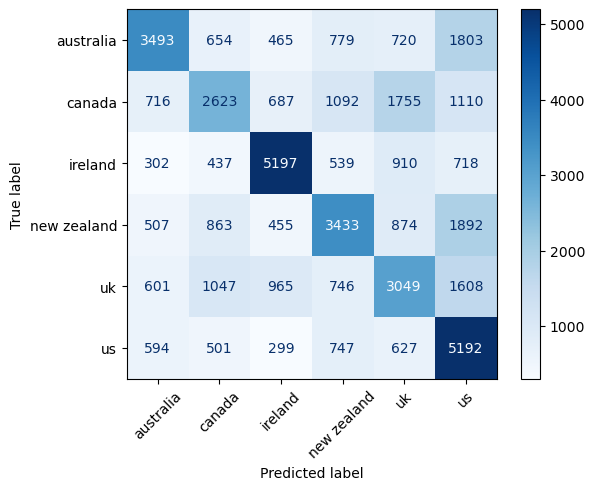

In [65]:
labels=['australia', 'canada', 'ireland', 'new zealand', 'uk', 'us']

display = plot_confusion_matrix(
        nb_pipeline,
        x_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
		xticks_rotation=45)
plt.show()
                    

## 1D CNN Model

In [66]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [67]:
numWords = 100000
max_length = 150

In [68]:
tokenizer = Tokenizer(num_words=numWords, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(training_df['final_text'].values)

In [69]:
X = tokenizer.texts_to_sequences(training_df['final_text'].values)
X = pad_sequences(X, maxlen=max_length)

In [70]:
label_encoder = LabelEncoder()
training_df['Country_Cat'] = label_encoder.fit_transform(training_df['country'])

In [71]:
X_train = X[x_train.index]
X_test = X[x_test.index]
Y_train = to_categorical(training_df['Country_Cat'][y_train.index])
Y_test = to_categorical(training_df['Country_Cat'][y_test.index])

In [74]:
#Embedding output dimensions = 100
#1D CNN layer with 250 filters and a kernel size of 3
model = Sequential()
model.add(Embedding(numWords, 100, input_length=max_length))
model.add(Dropout(0.1))
model.add(Conv1D(250,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())

In [75]:
epochs = 2
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/2
1200/1200 [==============================] - 123s 102ms/step - loss: 1.4481 - accuracy: 0.4160 - val_loss: 1.3322 - val_accuracy: 0.4813
Epoch 2/2
1200/1200 [==============================] - 122s 102ms/step - loss: 1.1726 - accuracy: 0.5563 - val_loss: 1.3553 - val_accuracy: 0.4796


In [76]:
model.evaluate(X_test, Y_test)

1500/1500 [==============================] - 5s 4ms/step - loss: 1.3577 - accuracy: 0.4824


[1.357701063156128, 0.48243749141693115]

In [77]:
y_pred_cnn = model.predict(X_test)

1500/1500 [==============================] - 5s 4ms/step


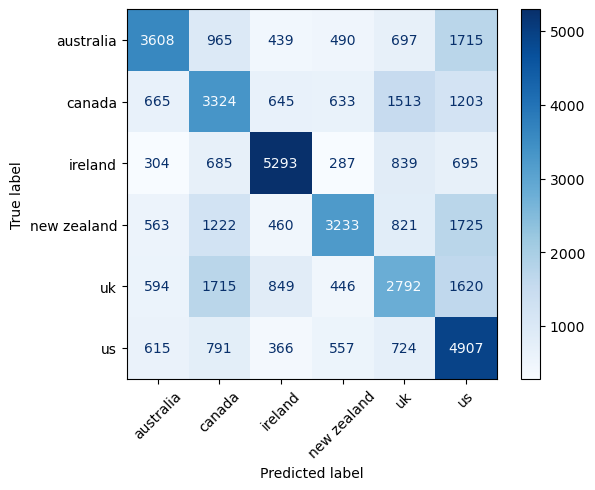

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(y_pred_cnn, axis=1)

labels=['australia', 'canada', 'ireland', 'new zealand', 'uk', 'us']
cm = confusion_matrix(training_df['Country_Cat'][y_test.index].to_numpy(), y_pred, labels = [0,1,2,3,4,5])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation = 45, cmap=plt.cm.Blues)
plt.show()

## Ensemble Model

In [79]:
y_pred = y_pred_cnn + y_pred_nb
res = np.argmax(y_pred, axis=1)

In [80]:
accuracy_score(res, training_df['Country_Cat'][y_test.index])

0.4949375

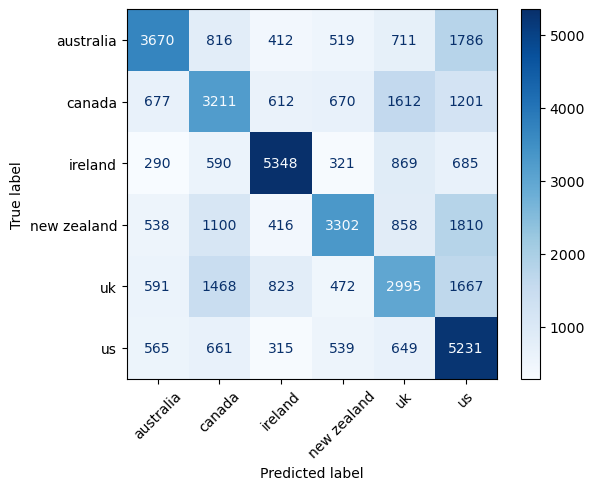

In [81]:
labels=['australia', 'canada', 'ireland', 'new zealand', 'uk', 'us']
cm = confusion_matrix(training_df['Country_Cat'][y_test.index].to_numpy(), res, labels = [0,1,2,3,4,5])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation = 45, cmap=plt.cm.Blues)
plt.show()

## Preparing Test Data

In [82]:
test_df['text_remove_newline'] = test_df['text'].swifter.apply(lambda x: x.replace("\n", ""))
test_df['text_demojize'] = test_df['text_remove_newline'].swifter.apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
	
test_df['expanded_urls'] = test_df['expanded_urls'].fillna("")
test_df['expanded_urls'] = test_df['expanded_urls'].apply(lambda x: x.strip(" "))

test_df['url_info'] = test_df['expanded_urls'].apply(lambda x: getUrlWords(x))
test_df['new_text'] = test_df['text_demojize'] + test_df['url_info']
test_df['final_text'] = test_df['new_text'].swifter.apply(lambda x: re.sub(r'\s+', ' ', x))

Pandas Apply: 100%|██████████| 60000/60000 [00:00<00:00, 119777.03it/s]


In [83]:
test_df['final_text'][11]

'Pls RT: An upcoming Report by @Kaleidoscope_T and @CWEquality is exposing the devastating ways in which the #COVID19 pandemic is affecting our #LGBTI+ siblings in the #Commonwealth. Please support and donate if you can https://t.co/tH7iFwLIjN #fundraising #humanrights #campaign https://t.co/lJ35xdhHaj covid 19 www kaleidoscopetrust com MsLadyPhyll status 1258470166314303489 photo 1'

In [84]:
test_df_tokenized = tokenizer.texts_to_sequences(test_df['final_text'].values)
test_df_padded = pad_sequences(test_df_tokenized, maxlen=max_length)

In [85]:
test_y_pred_cnn = model.predict(test_df_padded)

1875/1875 [==============================] - 7s 3ms/step


In [86]:
test_y_pred_nb = nb_pipeline.predict_proba(test_df['final_text'])

In [87]:
final_y_pred = test_y_pred_cnn + test_y_pred_nb

In [88]:
final_y_pred = np.argmax(final_y_pred, axis=1)

## Making A Submission

In [89]:
submission = pd.DataFrame()
submission["Id"] = test_df["Id"]
submission["Category"] = label_encoder.inverse_transform(final_y_pred)
submission.head(10)

,Id,Category
0,0,canada
1,1,canada
2,2,us
3,3,canada
4,4,new_zealand
5,5,ireland
6,6,us
7,7,us
8,8,new_zealand
9,9,australia


In [90]:
submission.to_csv(r"C:/Users/Thomas/Desktop/submission.csv", index=False)